In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR

/var/folders/_r/wzx98rg54ml36pgjzqvg5tm40000gn/T/ipykernel_61389/2814894024.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survived

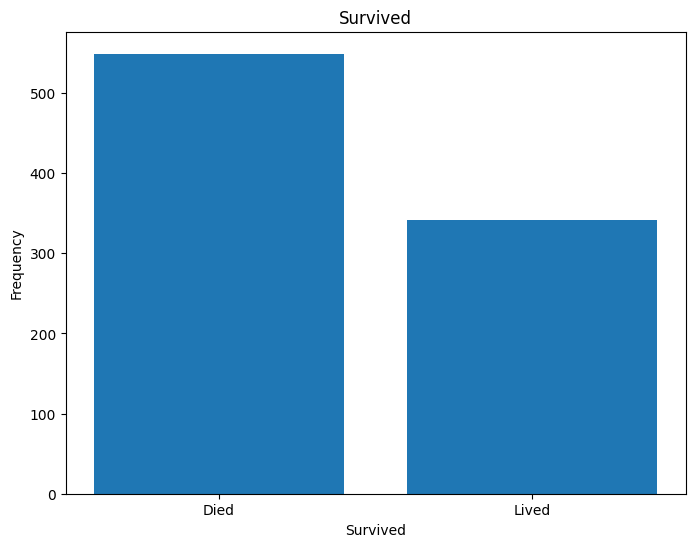

In [4]:
plt.figure(figsize=(8, 6))
plt.bar(["Died", "Lived"], df["Survived"].value_counts())
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Survived')
plt.show()

## Passenger Class

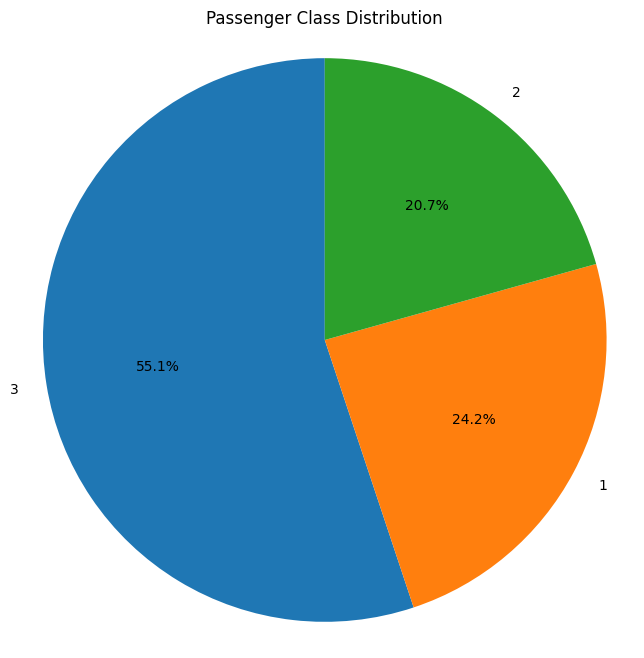

In [5]:
class_counts = df['Pclass'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Passenger Class Distribution')
plt.show()

del class_counts

## Gender

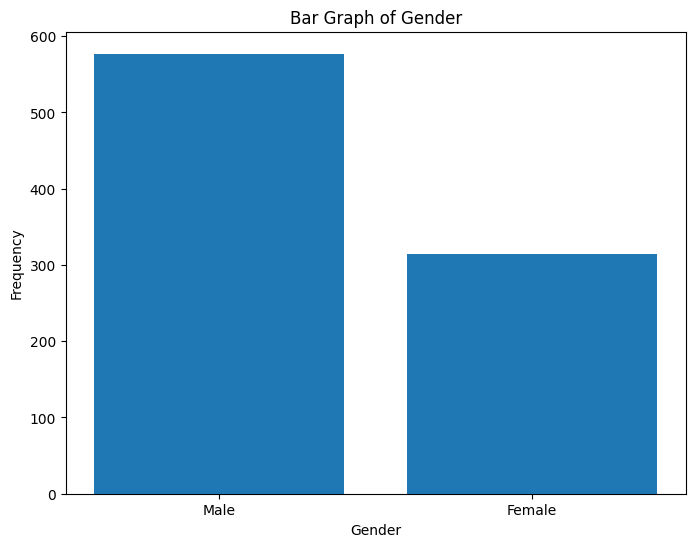

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(["Male", "Female"], df["Sex"].value_counts())
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Bar Graph of Gender')
plt.show()

## Age

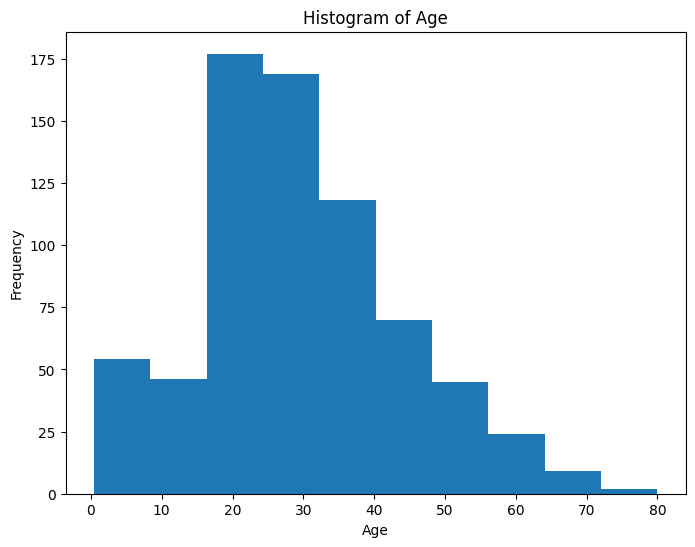

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(df["Age"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(df["Cabin"].value_counts())
print()
print(df["Name"].value_counts())
print()
print(df["Parch"].value_counts())
print()
print(df["Fare"].value_counts())
print()
print(df["Ticket"].value_counts())
print()
print(df["PassengerId"].value_counts())

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2

In [10]:
print(df["Cabin"].unique().size, "Unique Names")
print()
print(df["Name"].unique().size, "Unique Names")
print()
print(df["Parch"].unique().size, "Unique Parch")
print()
print(df["Fare"].unique().size, "Unique Fare")
print()
print(df["Ticket"].unique().size, "Unique Ticket")
print()
print(df["PassengerId"].unique().size, "Unique PassengerId")

148 Unique Names

891 Unique Names

7 Unique Parch

248 Unique Fare

681 Unique Ticket

891 Unique PassengerId


In [11]:
df.drop('Cabin', axis=1, inplace= True)
df.drop('Name', axis=1, inplace= True)
df.drop('Parch', axis=1, inplace= True)
df.drop('Fare', axis=1, inplace= True)
df.drop('Ticket', axis=1, inplace= True)
df.drop('PassengerId', axis=1, inplace= True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [13]:
print("Embarked:", df["Embarked"].unique())
df["Embarked"] = df["Embarked"].fillna('0')
df["Embarked"] = df["Embarked"].map({'S': 1, 'C': 2, 'Q': 3, '0': 0})

Embarked: ['S' 'C' 'Q' nan]


In [14]:
print("Gender:", df["Sex"].unique())
df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})

Gender: ['male' 'female']


In [15]:
t,f = 0,0
for i in df["Age"].notna():
    if(i):
        t += 1
    else:
        f += 1
print("Age has {} Null values and {} Non-Null Values.".format(f, t))
df["Age"] = df["Age"].fillna(df["Age"].median())

Age has 177 Null values and 714 Non-Null Values.


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,0,22.0,1,1
1,1,1,1,38.0,1,2
2,1,3,1,26.0,0,1
3,1,1,1,35.0,1,1
4,0,3,0,35.0,0,1


## Model Building

In [17]:
X = df.drop("Survived" , axis = 1)
Y = df["Survived"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(757, 5)
(134, 5)
(757,)
(134,)


In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [21]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)

Shape of X_train :  (757, 5)
Shape of Y_train :  (757,)
Shape of X_test :  (134, 5)
Shape of Y_test :  (134,)


## Linear Model Building

In [22]:
linearModel = LinearRegression()

In [23]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [24]:
linearModel.score(X_test, y_test)

0.44198589448321934

## Logistic Model Building

In [25]:
logisticModel = LogisticRegression()

In [26]:
logisticModel.fit(X_train, y_train)

LogisticRegression()

In [27]:
logisticModel.score(X_test, y_test)

0.8134328358208955

## SVM Model Building

In [28]:
SVRModel = SVR(kernel="poly", C=100)

In [29]:
SVRModel.fit(X_train, y_train)

SVR(C=100, kernel='poly')

In [30]:
SVRModel.score(X_test, y_test)

0.11335760021775276